In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import urllib
import scipy.optimize
import random
import ast
import json

In [2]:
def parseDataFromFile(fname):
    for l in open(fname):
        yield eval(l)
data = list(parseDataFromFile('fantasy_10000.json'))
data[1]

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': '5577844',
 'review_id': '52c8ac49496c153e4a97161e36b2db55',
 'rating': 5,
 'review_text': 'A beautiful story. Neil Gaiman is truly a unique storyteller. I did a combo of reading and listening to this story, and Neil is great at reading as well. I got interested in this book after seeing the movie, which I really enjoyed. The book is similar - maybe a bit more poetic - but I think the plot in the movie is a bit improved (not much, but a bit). \n I imagine this book came about because Neil read the below poem that he includes in the beginning, and then he invented a plot around it. The result is the book reads like a epic poem - it\'s creative, magical, and really, just right. \n Go and catch a falling star, \n Get with child a mandrake root, \n Tell me where all past years are, \n Or who cleft the devil\'s foot, \n Teach me to hear mermaids singing, \n Or to keep off envy\'s stinging, \n And find \n What wind \n Serves to adva

In [3]:
#loop a length of every rating from the data set into a rate list
rate = [d['rating'] for d in data]

In [4]:
#loop a length of every review_text from the data set into a review_length list
review_length = [len(d['review_text']) for d in data] 

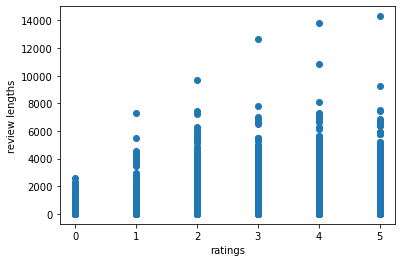

In [5]:
plt.xlabel('ratings')
plt.ylabel('review lengths')
plt.scatter(rate, review_length)

2) Train a simple predictor that estimates rating from review length

In [6]:
def regression_model(x, y):
    #Mean X and Y
    mean_X = np.mean(x)
    mean_Y = np.mean(y)
    
    #Total number of values
    n = len(x)
    numer = 0
    denom = 0
    for i in range(n):
        numer += (x[i] - mean_X) * (y[i] - mean_Y)
        denom += (x[i] - mean_X) ** 2
        m = numer / denom
        c = mean_Y - (m * mean_X)
    return m, c

In [7]:
regression_model(review_length, rate)

(6.873716748962727e-05, 3.685681355016952)

In [8]:
def feature(datum):
    feat = [[1, d] for d in datum]
    return feat

In [9]:
feat = feature(review_length)

In [10]:
theta,residuals,rank,s = np.linalg.lstsq(feat, rate, rcond=None)

In [11]:
theta

array([3.68568136e+00, 6.87371675e-05])

In [12]:
len(review_length)

10000

In [67]:
predict = [theta[0] + theta[1]*review_length[i] for i in range(len(review_length))] #predict all ratings

In [68]:
mean_squared_error(rate, predict)

1.5522086622355378

$$\theta_0 = 3.686$$ $$\theta_1 = 6.874 \times 10^{-5}$$ $$MSE = 1.552$$

3. Re-train your predictor so as to include a second feature based on the number of comments

In [69]:
def feature(datum1, datum2):
    feat = [[1, d1] for d1 in datum1]
    for i in range(len(datum2)):
        feat[i].append(datum2[i])
    return feat

In [70]:
n_comments = [d['n_comments'] for d in data]
feat = feature(review_length, n_comments)

In [71]:
theta,residuals,rank,s = np.linalg.lstsq(feat, rate, rcond=None)

In [72]:
theta

array([ 3.68916737e+00,  7.58407490e-05, -3.27928935e-02])

In [73]:
predict = [theta[0] + theta[1]*review_length[i] + theta[2]*n_comments[i] for i in range(len(review_length))] #predict all ratings

In [74]:
mean_squared_error(rate, predict)

1.5498351692774583

$$\theta_0 = 0.689$$ $$\theta_1 = 7.584 \times 10^{-5}$$ $$\theta_2 = -3.278 \times 10^{-2}$$ $$MSE = 1.55$$

The coefficient $\theta_1$ increases because when we add a new feature to train the model, the model tells us that the review lengths are highly effect the prediction of a positive rate.

4. Train a model that fits a polynomial function to estimate ratings based on review length.

In [75]:
#normalize length data
max_length = max(review_length)
norm_length = [d / max_length for d in review_length]

In [76]:
def feature(datum):
    feat = [[1, datum[i], datum[i]**2, datum[i]**3, datum[i]**4, datum[i]**5] for i in range(len(datum))]
    return feat
feat = feature(norm_length)

In [77]:
theta,residuals,rank,s = np.linalg.lstsq(feat, rate, rcond=None)

In [78]:
theta

array([  3.6441158 ,   2.47396326,  -5.65441081,   5.55309592,
       -15.94637484,  14.68100179])

In [79]:
predict = [theta[0] + theta[1]*norm_length[i] + theta[2]*norm_length[i] + theta[3]*norm_length[i] + theta[4]*norm_length[i] + theta[5]*norm_length[i] for i in range(len(norm_length))] #predict all ratings



In [80]:
mean_squared_error(rate, predict)

1.5534917955418688

$$MSE = 1.5534$$

5. Repeat the above question, but this time split the data into a training and test set. You should split the data randomly into 50%/50% train/test fractions. Report the MSE of each model separately on the training and test set

In [81]:
#for Q2 model
random.shuffle(data)
X_train, X_test, y_train, y_test = train_test_split(review_length, rate, test_size = 0.5, random_state=42)
def feature(datum):
    feat = [[1, d] for d in datum]
    return feat
feat = feature(X_train)
theta,residuals,rank,s = np.linalg.lstsq(feat, y_train, rcond=None)
predict = [theta[0] + theta[1]*X_train[i] for i in range(len(X_train))] #predict all ratings
print ('MSE for Q2 model on training set:', mean_squared_error(y_train, predict))

feat = feature(X_test)
theta,residuals,rank,s = np.linalg.lstsq(feat, y_test, rcond=None)
predict = [theta[0] + theta[1]*X_test[i] for i in range(len(X_test))] #predict all ratings
print ('MSE for Q2 model on testing set:', mean_squared_error(y_test, predict))

MSE for Q2 model on training set: 1.492944377477189
MSE for Q2 model on testing set: 1.6098110077863164


In [82]:
#for Q3 model
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(review_length, rate, n_comments, test_size = 0.5, random_state=42)
def feature(datum1, datum2):
    feat = [[1, d1] for d1 in datum1]
    for i in range(len(datum2)):
        feat[i].append(datum2[i])
    return feat
feat = feature(X_train, z_train)
theta,residuals,rank,s = np.linalg.lstsq(feat, y_train, rcond=None)
predict = [theta[0] + theta[1]*X_train[i] + theta[2]*z_train[i] for i in range(len(X_train))] #predict all ratings
print ('MSE for Q3 model on training set:', mean_squared_error(y_train, predict))

feat = feature(X_test, z_test)
theta,residuals,rank,s = np.linalg.lstsq(feat, y_test, rcond=None)
predict = [theta[0] + theta[1]*X_test[i] + theta[2]*z_test[i] for i in range(len(X_test))] #predict all ratings
print ('MSE for Q3 model on testing set:', mean_squared_error(y_test, predict))



MSE for Q3 model on training set: 1.4916324183335332
MSE for Q3 model on testing set: 1.6057525845166616


In [83]:
#for Q4 model
X_train, X_test, y_train, y_test = train_test_split(review_length, rate, test_size = 0.5, random_state=42)


#normalize length data
max_length = max(X_train)
norm_length = [d / max_length for d in X_train]

def feature(datum):
    feat = [[1, datum[i], datum[i]**2, datum[i]**3, datum[i]**4, datum[i]**5] for i in range(len(datum))]
    return feat
feat = feature(norm_length)
theta,residuals,rank,s = np.linalg.lstsq(feat, y_test, rcond=None)
predict = [theta[0] + theta[1]*norm_length[i] + theta[2]*norm_length[i] + theta[3]*norm_length[i] + theta[4]*norm_length[i] + theta[5]*norm_length[i] for i in range(len(norm_length))] #predict all ratings
print('MSE for Q4 model on training set:', mean_squared_error(y_train, predict))


#normalize length data
max_length = max(X_test)
norm_length = [d / max_length for d in X_train]

def feature(datum):
    feat = [[1, datum[i], datum[i]**2, datum[i]**3, datum[i]**4, datum[i]**5] for i in range(len(datum))]
    return feat
feat = feature(norm_length)
theta,residuals,rank,s = np.linalg.lstsq(feat, y_test, rcond=None)
predict = [theta[0] + theta[1]*norm_length[i] + theta[2]*norm_length[i] + theta[3]*norm_length[i] + theta[4]*norm_length[i] + theta[5]*norm_length[i] for i in range(len(norm_length))] #predict all ratings
print('MSE for Q4 model on testing set:', mean_squared_error(y_test, predict))

MSE for Q4 model on training set: 1.4931412388987402
MSE for Q4 model on testing set: 1.6189028024399472
